In [14]:
import pandas as pd
import re

# Load WhatsApp export files
with open("chat1.txt", encoding="utf-8") as f1, open("chat2.txt", encoding="utf-8") as f2:
    raw = f1.read() + "\n" + f2.read()

# Extract messages using regex
pattern = r'\[(\d{2}/\d{2}/\d{4}), (\d{2}:\d{2}:\d{2})\] (.*?): (.+)'
matches = re.findall(pattern, raw)
df = pd.DataFrame(matches, columns=['date', 'time', 'sender', 'message'])

# Convert to datetime
df['timestamp'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%d/%m/%Y %H:%M:%S')
df.drop(['date', 'time'], axis=1, inplace=True)


In [15]:
import pandas as pd
import re

# Load WhatsApp export files
with open("chat1.txt", encoding="utf-8") as f1, open("chat2.txt", encoding="utf-8") as f2:
    raw = f1.read() + "\n" + f2.read()

# Extract messages using regex
pattern = r'\[(\d{2}/\d{2}/\d{4}), (\d{2}:\d{2}:\d{2})\] (.*?): (.+)'
matches = re.findall(pattern, raw)
df = pd.DataFrame(matches, columns=['date', 'time', 'sender', 'message'])

# Convert to datetime
df['timestamp'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%d/%m/%Y %H:%M:%S')
df.drop(['date', 'time'], axis=1, inplace=True)


In [16]:
import emoji
import string
from textblob import TextBlob

df['weekday'] = df['timestamp'].dt.day_name()
df['hour'] = df['timestamp'].dt.hour
df['length'] = df['message'].apply(len)
df['sentiment'] = df['message'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['emojis'] = df['message'].apply(lambda text: ''.join(c for c in text if c in emoji.EMOJI_DATA))
df['mentions_caleb'] = df['message'].str.contains(r'\bcaleb\b', case=False)


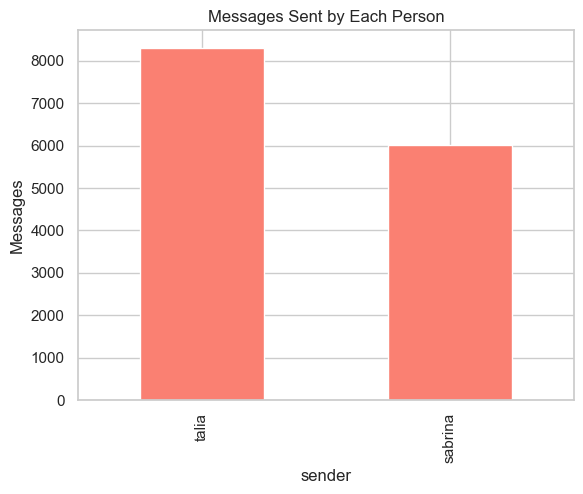

In [9]:
data['sender'].value_counts().plot(kind='bar', color='salmon', title='Messages Sent by Each Person')
plt.ylabel("Messages")
plt.show()


In [17]:
print("Total messages:\n", df['sender'].value_counts())
print("\nFirst message:", df['timestamp'].min())
print("Longest message gap (hours):", df['timestamp'].sort_values().diff().max())
print("\nMost active day:\n", df['weekday'].value_counts())
print("\nMost active hour:\n", df['hour'].value_counts().sort_index())


Total messages:
 sender
Sabrina        6014
~Talia✨        4270
Talia Reddy    4036
Name: count, dtype: int64

First message: 2021-02-27 03:57:48
Longest message gap (hours): 324 days 16:37:13

Most active day:
 weekday
Sunday       2727
Monday       2288
Friday       2054
Wednesday    1948
Tuesday      1904
Thursday     1900
Saturday     1499
Name: count, dtype: int64

Most active hour:
 hour
0      119
1       33
2       13
3        9
4        1
5       12
6       73
7      200
8      455
9      716
10     647
11     908
12     879
13     692
14     872
15     944
16    1330
17    1425
18    1683
19    1262
20     988
21     411
22     335
23     313
Name: count, dtype: int64


In [18]:
from collections import Counter

talia_df = df[df['sender'] == 'talia']
talia_words = ' '.join(talia_df['message']).lower().translate(str.maketrans('', '', string.punctuation)).split()
word_counts = Counter(talia_words)

print("\nTop Talia words:\n", word_counts.most_common(15))
print("\nTop Talia emojis:\n", Counter(''.join(talia_df['emojis'])).most_common(10))
print("\nMentions of 'Caleb':", df['mentions_caleb'].sum())



Top Talia words:
 []

Top Talia emojis:
 []

Mentions of 'Caleb': 91


In [25]:
taliaisms = {w: c for w, c in word_counts.items() if c >= 3 and w not in ['the', 'that', 'with', 'this', 'have', 'just', 'from', 'your', 'about', 'really']}

print("\nTalia-isms:\n", taliaisms)



Talia-isms:
 {}


In [26]:
print(Counter(talia_words).most_common(50))


[]


In [20]:
df['month'] = df['timestamp'].dt.to_period('M')
avg_length = df.groupby('month')['length'].mean()
avg_sentiment = df.groupby('month')['sentiment'].mean()

print("\nAverage message length over time:\n", avg_length.tail())
print("\nSentiment trend over time:\n", avg_sentiment.tail())



Average message length over time:
 month
2024-12    24.370904
2025-01    21.416168
2025-02    19.447887
2025-03    21.566667
2025-04    21.985149
Freq: M, Name: length, dtype: float64

Sentiment trend over time:
 month
2024-12    0.058084
2025-01    0.088950
2025-02    0.054950
2025-03    0.059738
2025-04    0.080967
Freq: M, Name: sentiment, dtype: float64


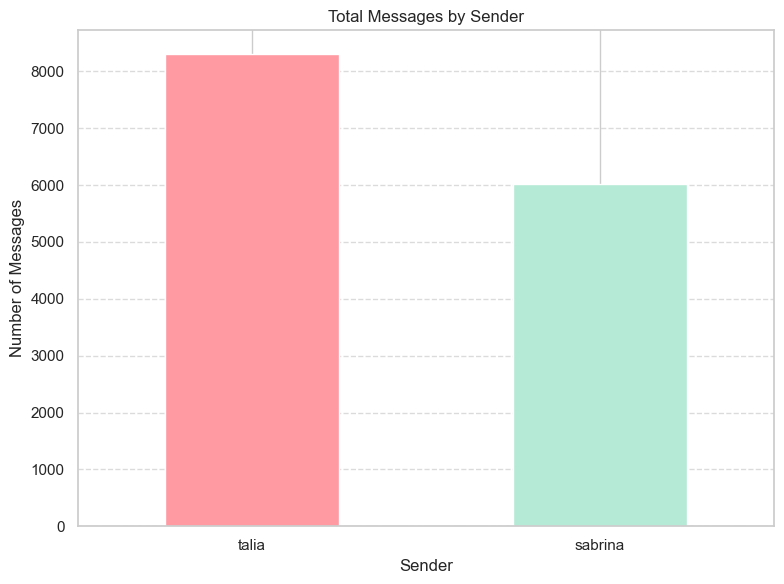

In [23]:
# Re-standardise sender names to merge variants
df['sender'] = df['sender'].str.strip().str.lower()
df['sender'] = df['sender'].apply(
    lambda x: 'talia' if 'talia' in x else ('sabrina' if 'sabrina' in x else x)
)

# Total messages by sender
msg_counts = df['sender'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
msg_counts.plot(kind='bar', color=['#ff9aa2', '#b5ead7'])  # Customize colors as you like
plt.title("Total Messages by Sender")
plt.xlabel("Sender")
plt.ylabel("Number of Messages")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
